# Machine Hack: E-commerce Price Prediction

E-commerce platforms have been in existence for more than 2 decades now. The popularity and its preference as a common choice for buying and selling essential products have grown rapidly and exponentially over the past few years. E-commerce has impacted the lifestyle of common people to a huge extent. Many such platforms are competing over each other for dominance by providing consumer goods at a competitive price. In this hackathon, we challenge data science enthusiasts to predict the price of commodities on an e-commerce platform.

[Machine Hack: E-Commerce Price Prediction](https://www.machinehack.com/course/e-commerce-price-prediction-weekend-hackathon-8/)

Given are 7 distinguishing factors that can influence the price of a product on an e-commerce platform. Your objective as a data scientist is to build a machine learning model that can accurately predict the price of a product based on the given factors.

## Load the data from Github

In [6]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/Machine-Hack-Ecomm-Price-Prediction/master/Data/Test.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/Machine-Hack-Ecomm-Price-Prediction/master/Data/Train.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [7]:
df_Train.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [ ]:
df_Train.info()

In [ ]:
df_Train.describe()

In [13]:
df_Train.shape

(2452, 8)

In [ ]:
df_Test.shape

In [ ]:
df_Train.isnull().sum()

In [ ]:
df_Train.columns

## Data Insight and Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df_Train['Product_Brand'].value_counts()

B-3078    688
B-133      91
B-2679     42
B-2372     40
B-2307     35
         ... 
B-376       1
B-462       1
B-2160      1
B-639       1
B-123       1
Name: Product_Brand, Length: 1010, dtype: int64

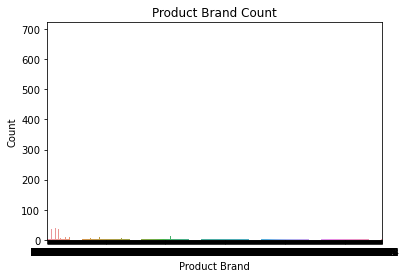

In [23]:
sns.countplot(x='Product_Brand', data=df_Train)
plt.xlabel("Product Brand")
plt.ylabel("Count")
plt.title("Product Brand Count")
plt.show()

In [25]:
df_Test['Product_Brand'].value_counts()

B-3078    317
B-133      45
B-2372     21
B-1517     15
B-2679     13
         ... 
B-506       1
B-2794      1
B-613       1
B-2221      1
B-2924      1
Name: Product_Brand, Length: 494, dtype: int64

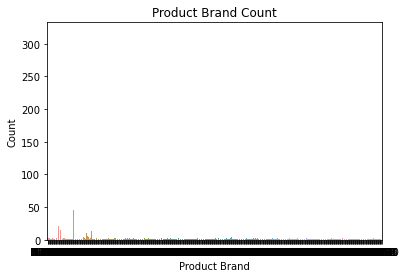

In [24]:
sns.countplot(x='Product_Brand', data=df_Test)
plt.xlabel("Product Brand")
plt.ylabel("Count")
plt.title("Product Brand Count")
plt.show()

## Feature Engineering

### To check for duplicates and remove them

Shape of the Dataframe before removing the Duplicates

In [ ]:
df_Train.shape

In [26]:
#Remove columns not required for the model
df_Train = df_Train.drop(['Product', 'Product_Brand'], axis=1)

In [27]:
#Dataframe function to drop duplicates
df_Train.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_Train.shape

### Extract from the Date Columns

In [ ]:
df_Train.head()

In [28]:
from datetime import datetime
import time
df_Train['Date'] = pd.to_datetime(df_Train['Date'])
df_Test['Date'] = pd.to_datetime(df_Test['Date'])
df_Train['Year'] = df_Train['Date'].dt.year
df_Test['Year'] = df_Test['Date'].dt.year
df_Train['Month'] = df_Train['Date'].dt.month
df_Test['Month'] = df_Test['Date'].dt.month
df_Train['Day'] = df_Train['Date'].dt.day
df_Test['Day'] = df_Test['Date'].dt.day
df_Train = df_Train.drop(['Date'], axis=1)
df_Test = df_Test.drop(['Date'], axis=1)

In [29]:
df_Train.head()

,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Year,Month,Day
0,bags wallets belts,bags,hand bags,4.3,291.0,2017,2,3
1,clothing,women s clothing,western wear,3.1,897.0,2015,7,1
2,home decor festive needs,showpieces,ethnic,3.5,792.0,2019,1,12
3,beauty and personal care,eye care,h2o plus eye care,4.0,837.0,2014,12,12
4,clothing,men s clothing,t shirts,4.3,470.0,2013,12,12


### Encoding the columns

Using Label Encoding since its Tree Based Algorithm

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Train['Item_Category'] = le.fit_transform(df_Train['Item_Category'])
df_Test['Item_Category'] = le.fit_transform(df_Test['Item_Category'])
df_Train['Subcategory_1'] = le.fit_transform(df_Train['Subcategory_1'])
df_Test['Subcategory_1'] = le.fit_transform(df_Test['Subcategory_1'])
df_Train['Subcategory_2'] = le.fit_transform(df_Train['Subcategory_2'])
df_Test['Subcategory_2'] = le.fit_transform(df_Test['Subcategory_2'])
df_Train['Year'] = le.fit_transform(df_Train['Year'])
df_Test['Year'] = le.fit_transform(df_Test['Year'])
df_Train['Month'] = le.fit_transform(df_Train['Month'])
df_Test['Month'] = le.fit_transform(df_Test['Month'])
df_Train['Day'] = le.fit_transform(df_Train['Day'])
df_Test['Day'] = le.fit_transform(df_Test['Day'])

In [31]:
df_Train.head()

,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Year,Month,Day
0,7,10,137,4.3,291.0,5,1,1
1,10,127,329,3.1,897.0,3,6,0
2,29,112,101,3.5,792.0,7,0,5
3,8,37,134,4.0,837.0,2,11,5
4,10,80,296,4.3,470.0,1,11,5


### Scaling the Sales Column to normalize

In [32]:
df_Train['Selling_Price']=np.log1p(df_Train['Selling_Price'])

## Feature Selection

### Correlation of Data

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

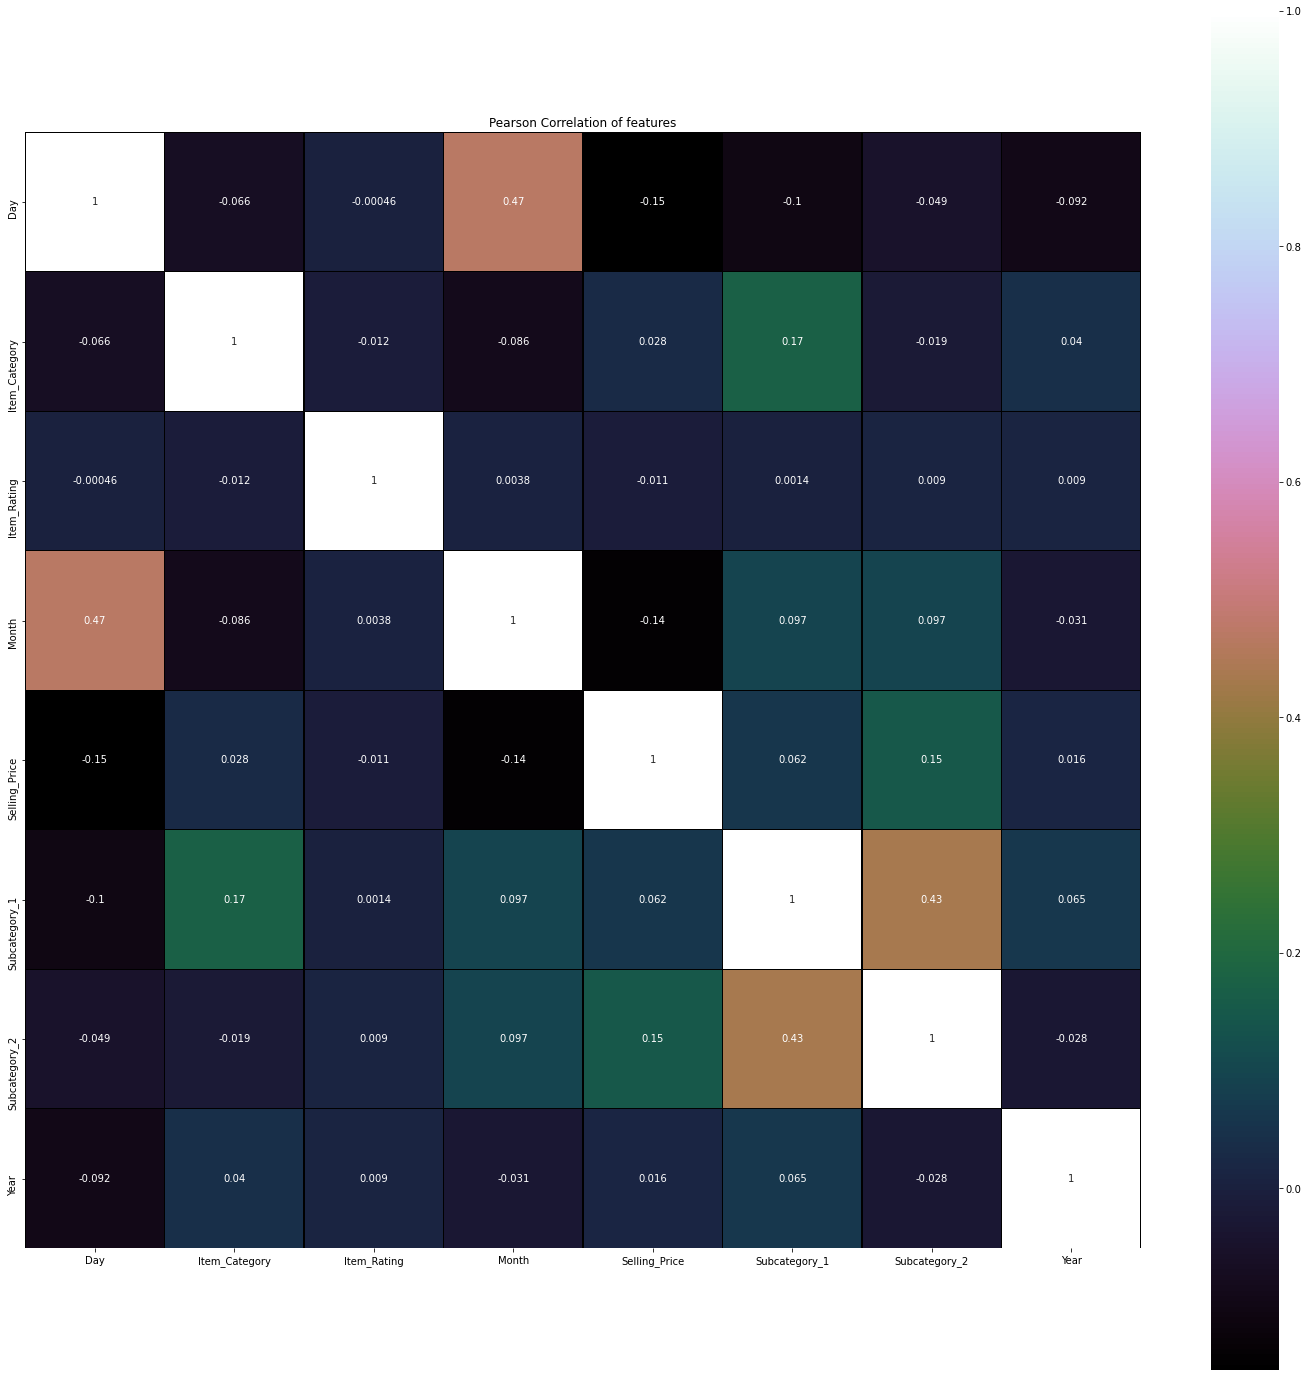

In [34]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_Train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [ ]:
df_Train.corr()

In [ ]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

### Multi-Colinearity of Data

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_multi = df_Train
df_multi = df_multi.drop('Selling_Price', axis=1)

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

In [ ]:
vif.round(1)

## Data Modelling for Prediction

### Split the Data to x variable and y variable

In [35]:
x = df_Train
x = x.drop(['Selling_Price'], axis=1)
y = df_Train['Selling_Price']
x_pred = df_Test
x_pred = x_pred.drop(['Product', 'Product_Brand'], axis=1)

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, criterion='mse', max_depth=5, n_jobs=-1, random_state=294)

In [ ]:
rf.fit(x,np.ravel(y))

In [ ]:
y_pred = rf.predict(x_pred)

In [ ]:
y_pred = np.expm1(y_pred)

In [ ]:
y_pred

In [ ]:
submission_df = pd.DataFrame({'Selling_Price':y_pred})
#writer = pd.ExcelWriter('Sample Submission RF v1.xslx', engine='xlsxwriter')
submission_df.to_csv('Sample Submission RF v1.csv', index=False)

### Cat Boost Regressor

In [39]:
from catboost import CatBoostRegressor
cb_rg = CatBoostRegressor(learning_rate=0.15, n_estimators=500, eval_metric = 'RMSE', loss_function = 'MAE', subsample=0.70, max_depth=5)#, scale_pos_weight=2.5)

In [40]:
cb_rg.fit(x,np.ravel(y))

0:	learn: 1.1157276	total: 53.6ms	remaining: 26.7s
1:	learn: 1.0353408	total: 55.6ms	remaining: 13.8s
2:	learn: 0.9826434	total: 57.4ms	remaining: 9.51s
3:	learn: 0.9307502	total: 59.3ms	remaining: 7.35s
4:	learn: 0.8976238	total: 60.9ms	remaining: 6.03s
5:	learn: 0.8901075	total: 62.6ms	remaining: 5.15s
6:	learn: 0.8608960	total: 64.3ms	remaining: 4.53s
7:	learn: 0.8401486	total: 66ms	remaining: 4.06s
8:	learn: 0.8200748	total: 67.6ms	remaining: 3.69s
9:	learn: 0.8080747	total: 69.5ms	remaining: 3.4s
10:	learn: 0.7990682	total: 71.2ms	remaining: 3.16s
11:	learn: 0.7900153	total: 72.8ms	remaining: 2.96s
12:	learn: 0.7820946	total: 74.4ms	remaining: 2.79s
13:	learn: 0.7788407	total: 76.1ms	remaining: 2.64s
14:	learn: 0.7727832	total: 77.9ms	remaining: 2.52s
15:	learn: 0.7681886	total: 79.5ms	remaining: 2.4s
16:	learn: 0.7636939	total: 81.1ms	remaining: 2.3s
17:	learn: 0.7608803	total: 82.8ms	remaining: 2.22s
18:	learn: 0.7583843	total: 84.3ms	remaining: 2.13s
19:	learn: 0.7534955	total:

224:	learn: 0.5960164	total: 427ms	remaining: 521ms
225:	learn: 0.5956639	total: 429ms	remaining: 520ms
226:	learn: 0.5952906	total: 431ms	remaining: 518ms
227:	learn: 0.5951961	total: 432ms	remaining: 516ms
228:	learn: 0.5950924	total: 434ms	remaining: 514ms
229:	learn: 0.5948846	total: 436ms	remaining: 512ms
230:	learn: 0.5945491	total: 438ms	remaining: 510ms
231:	learn: 0.5940781	total: 439ms	remaining: 507ms
232:	learn: 0.5940801	total: 441ms	remaining: 506ms
233:	learn: 0.5937952	total: 443ms	remaining: 503ms
234:	learn: 0.5937174	total: 444ms	remaining: 501ms
235:	learn: 0.5934412	total: 446ms	remaining: 499ms
236:	learn: 0.5933711	total: 448ms	remaining: 497ms
237:	learn: 0.5931933	total: 449ms	remaining: 495ms
238:	learn: 0.5925052	total: 452ms	remaining: 493ms
239:	learn: 0.5919713	total: 454ms	remaining: 492ms
240:	learn: 0.5919048	total: 456ms	remaining: 490ms
241:	learn: 0.5915658	total: 458ms	remaining: 488ms
242:	learn: 0.5913824	total: 459ms	remaining: 486ms
243:	learn: 

451:	learn: 0.5611715	total: 803ms	remaining: 85.2ms
452:	learn: 0.5610091	total: 805ms	remaining: 83.5ms
453:	learn: 0.5608985	total: 807ms	remaining: 81.8ms
454:	learn: 0.5608507	total: 809ms	remaining: 80ms
455:	learn: 0.5606671	total: 811ms	remaining: 78.2ms
456:	learn: 0.5606440	total: 813ms	remaining: 76.5ms
457:	learn: 0.5602394	total: 814ms	remaining: 74.7ms
458:	learn: 0.5602093	total: 816ms	remaining: 72.9ms
459:	learn: 0.5601146	total: 818ms	remaining: 71.1ms
460:	learn: 0.5593626	total: 819ms	remaining: 69.3ms
461:	learn: 0.5588540	total: 821ms	remaining: 67.5ms
462:	learn: 0.5586801	total: 822ms	remaining: 65.7ms
463:	learn: 0.5586296	total: 824ms	remaining: 64ms
464:	learn: 0.5583607	total: 826ms	remaining: 62.2ms
465:	learn: 0.5583512	total: 827ms	remaining: 60.4ms
466:	learn: 0.5583308	total: 829ms	remaining: 58.6ms
467:	learn: 0.5582741	total: 831ms	remaining: 56.8ms
468:	learn: 0.5581561	total: 833ms	remaining: 55ms
469:	learn: 0.5580807	total: 834ms	remaining: 53.2ms

In [41]:
y_pred = cb_rg.predict(x_pred)

In [42]:
y_pred = np.expm1(y_pred)

In [44]:
submission_df = pd.DataFrame({'Selling_Price':y_pred})
#writer = pd.ExcelWriter('Sample Submission RF v1.xslx', engine='xlsxwriter')
submission_df.to_csv('Sample Submission CB v1.csv', index=False)